## 모듈 import

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd

## 데이터 다운로드

In [2]:
from opendata import dataset

# 데이터셋 다운로드
dataset.download('서울시대중교통')
dataset.download('서울시주민등록인구')

======= 다운로드 시작 =======

data/seoul_transportation.xlsx


  0%|          | 0.00/26.2k [00:00<?, ?B/s]


======= 다운로드 완료 =======
======= 다운로드 시작 =======

data/seoul_population.csv


  0%|          | 0.00/3.55k [00:00<?, ?B/s]


======= 다운로드 완료 =======


## Excel

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

### Excel - 불러오기

Excel 데이터를 바로 읽어들일 수 있으며, `sheet_name`을 지정하면 해당 sheet를 가져옵니다.
로드하면 기본적으로 DataFrame 형식으로 로드합니다.

[참고] `pd.read_excel()`로 엑셀 데이터 로드시 에러 발생한다면 `engine='openpyxl'`을 추가

In [3]:
excel = pd.read_excel('data/seoul_transportation.xlsx', sheet_name='철도')

In [5]:
excel.head() # 상위 5개 조회. 인자로 10주면 10개 조회

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [6]:
excel = pd.read_excel('data/seoul_transportation.xlsx', sheet_name='버스')
excel.head()

,대중교통구분,년월,승차총승객수
0,버스,201711,163443126
1,버스,201712,162521011
2,버스,201801,153335185
3,버스,201802,134768582
4,버스,201803,166177855


`sheet_name`을 None으로 지정하면, 모든 sheet를 가지고 옵니다.

가지고 올 때는 OrderedDict로 가져오며, `keys()`로 **시트명을 조회**할 수 있습니다.

In [8]:
excel = pd.read_excel('data/seoul_transportation.xlsx', sheet_name=None)
excel # dictionary로 시트 이름이 key, 나머지가 value로 들어감

{'철도':     대중교통구분    노선명      년월   승차총승객수
 0      지하철    1호선  201711  8633618
 1      지하철    1호선  201712  8737235
 2      지하철    1호선  201801  8145989
 3      지하철    1호선  201802  7273309
 4      지하철    1호선  201803  8692551
 ..     ...    ...     ...      ...
 596    지하철  우이신설선  201901  1263643
 597    지하철  우이신설선  201902  1102109
 598    지하철  우이신설선  201903  1402393
 599    지하철  우이신설선  201904  1403115
 600    지하철  우이신설선  201905  1469681
 
 [601 rows x 4 columns],
 '버스':    대중교통구분      년월     승차총승객수
 0      버스  201711  163443126
 1      버스  201712  162521011
 2      버스  201801  153335185
 3      버스  201802  134768582
 4      버스  201803  166177855
 5      버스  201804  160452595
 6      버스  201805  164390595
 7      버스  201806  156999747
 8      버스  201807  163736112
 9      버스  201808  160240197
 10     버스  201809  151311657
 11     버스  201810  165820934
 12     버스  201811  163017758
 13     버스  201812  158049446
 14     버스  201901  153037549
 15     버스  201902  131621925
 16     버스  201903 

`keys()`로 포함하고 있는 시트를 조회합니다.

In [9]:
# 시트 조회 (dictionary에서 key 조회하는 것과 같다)
excel.keys()

dict_keys(['철도', '버스'])

In [10]:
excel['철도'].head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [11]:
excel['버스'].head()

,대중교통구분,년월,승차총승객수
0,버스,201711,163443126
1,버스,201712,162521011
2,버스,201801,153335185
3,버스,201802,134768582
4,버스,201803,166177855


### Excel - 저장하기

DataFrame을 Excel로 저장할 수 있으며, Excel로 저장시 **파일명**을 지정합니다.

- `index=False` 옵션은 가급적 꼭 지정하는 옵션입니다. 지정을 안하면 **index가 별도의 컬럼으로 저장**되게 됩니다.
- `sheet_name`을 지정하여, 저장할 시트의 이름을 변경할 수 있습니다.


In [13]:
excel = pd.read_excel('data/seoul_transportation.xlsx', sheet_name='철도')
excel.head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [14]:
type(excel)

pandas.core.frame.DataFrame

별도의 시트명 지정 없이 저장

In [15]:
excel.to_excel('sample.xlsx', index=True) # xlsx를 까보면 A열에 index가 같이 저장된 것을 볼 수 있다.

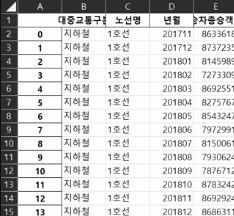

시트명을 **샘플**로 지정하여 저장

In [24]:
# 시트 이름 지정, but index는 함께 저장하지 않은 것
excel.to_excel('sample1.xlsx', index=False, sheet_name='샘플')

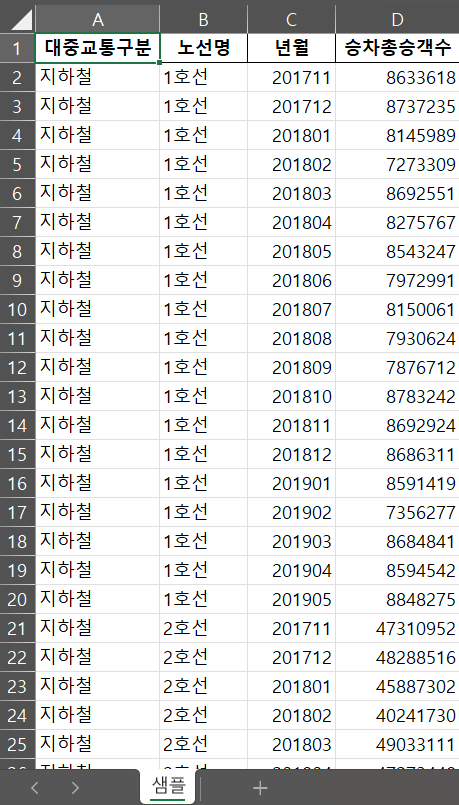

In [23]:
excel3 = pd.read_excel('sample1.xlsx')
excel.head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


## CSV (Comma Separated Values)

- 한 줄이 한 개의 행에 해당하며, 열 사이에는 **쉼표(,)를 넣어 구분**합니다.
- Excel보다는 훨씬 가볍고 **차지하는 용량이 적기 때문에 대부분의 파일데이터는 csv 형태**로 제공됩니다.

### CSV - 불러오기

In [25]:
df = pd.read_csv('data/seoul_population.csv')

In [26]:
df

,연도,자치구,세대수,인구 합계,남자 인구 합계,여자 인구 합계,한국인 인구 합계,한국인 남자 인구수,한국인 여자 인구수,등록 외국인 인구 합계,등록 외국인 인구 남자수,등록 외국인 인구 여자수,세대당 인구,65세 이상 고령자 수
0,2020,합계,"4,417,954","9,911,088","4,816,522","5,094,566","9,668,465","4,701,723","4,966,742","242,623","114,799","127,824",2.19,"1,568,331"
1,2020,종로구,"75,003","158,996","76,876","82,120","149,384","72,635","76,749","9,612","4,241","5,371",1.99,"28,507"
2,2020,중구,"63,686","134,635","65,776","68,859","125,240","61,222","64,018","9,395","4,554","4,841",1.97,"24,495"
3,2020,용산구,"113,093","244,645","118,835","125,810","230,040","110,722","119,318","14,605","8,113","6,492",2.03,"40,247"
4,2020,성동구,"135,870","300,505","146,424","154,081","293,556","143,387","150,169","6,949","3,037","3,912",2.16,"45,603"
5,2020,광진구,"167,427","360,109","173,000","187,109","346,682","167,310","179,372","13,427","5,690","7,737",2.07,"50,560"
6,2020,동대문구,"167,598","357,014","175,322","181,692","342,837","169,769","173,068","14,177","5,553","8,624",2.05,"61,796"
7,2020,중랑구,"185,920","399,562","197,118","202,444","394,702","195,165","199,537","4,860","1,953","2,907",2.12,"69,447"
8,2020,성북구,"195,396","447,056","214,658","232,398","437,153","210,810","226,343","9,903","3,848","6,055",2.24,"73,770"
9,2020,강북구,"145,896","311,569","151,466","160,103","308,055","150,143","157,912","3,514","1,323","2,191",2.11,"63,422"


### CSV - 저장하기

저장하는 방법은 excel과 유사합니다. 다만, csv파일 형식에는 **`sheet_name` 옵션은 없습니다.**

In [27]:
df = pd.read_csv('data/seoul_population.csv')

`to_csv()`으로 csv 파일형식으로 저장할 수 있습니다.

In [28]:
df.to_csv('sample.csv', index=False) # 마찬가지로 index포함할지 안할지 결정 가능

읽어들인 **Excel 파일도 Csv로 저장**할 수 있습니다.

In [29]:
excel = pd.read_excel('data/seoul_transportation.xlsx', sheet_name='버스', engine='openpyxl')
excel.head()

,대중교통구분,년월,승차총승객수
0,버스,201711,163443126
1,버스,201712,162521011
2,버스,201801,153335185
3,버스,201802,134768582
4,버스,201803,166177855


In [30]:
excel.to_csv('sample1.csv', index=False)

## json(JavaScript Object Notation)

- JavaScript Object Notation라는 의미의 축약어로 데이터를 저장하거나 전송할 때 많이 사용되는 경량의 DATA 교환 형식
- 용량이 작고, 파일의 구조를 이해하기 직관적
- 데이터 전송시 많이 사용됩니다.

In [33]:
import pprint
import json
import requests

# USD 환율 정보 실시간 요청 API
# 결과 형식을 json 형식으로 반환
url = "https://api.exchangerate-api.com/v4/latest/USD"

# API로 실시간 데이터 요청
ret = requests.get(url)

# json 형식의 파일로 로드
json_data = json.loads(ret.text)

# 출력(pretty print라서 pprint)
pprint.pprint(json_data)

{'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free',
 'base': 'USD',
 'date': '2025-07-05',
 'provider': 'https://www.exchangerate-api.com',
 'rates': {'AED': 3.67,
           'AFN': 69.93,
           'ALL': 83.07,
           'AMD': 384.15,
           'ANG': 1.79,
           'AOA': 919.78,
           'ARS': 1239.83,
           'AUD': 1.53,
           'AWG': 1.79,
           'AZN': 1.7,
           'BAM': 1.66,
           'BBD': 2,
           'BDT': 122.62,
           'BGN': 1.66,
           'BHD': 0.376,
           'BIF': 2983.5,
           'BMD': 1,
           'BND': 1.27,
           'BOB': 6.92,
           'BRL': 5.41,
           'BSD': 1,
           'BTN': 85.49,
           'BWP': 13.28,
           'BYN': 3.06,
           'BZD': 2,
           'CAD': 1.36,
           'CDF': 2883.3,
           'CHF': 0.794,
           'CLP': 929.07,
           'CNY': 7.17,
           'COP': 4012.24,
           'CRC': 504.93,
           'CUP': 24,
           'CVE': 93.62,
           '

In [40]:
ret # 리턴은 응답코드

<Response [200]>

In [42]:
ret.text # 얼핏 보면 json처럼 보이긴 하지만, 결국 str임. 그래서 json형식으로 맞춘 다음 좀 더 예쁘게 pprint로 출력한 것

'{"provider":"https://www.exchangerate-api.com","WARNING_UPGRADE_TO_V6":"https://www.exchangerate-api.com/docs/free","terms":"https://www.exchangerate-api.com/terms","base":"USD","date":"2025-07-05","time_last_updated":1751673602,"rates":{"USD":1,"AED":3.67,"AFN":69.93,"ALL":83.07,"AMD":384.15,"ANG":1.79,"AOA":919.78,"ARS":1239.83,"AUD":1.53,"AWG":1.79,"AZN":1.7,"BAM":1.66,"BBD":2,"BDT":122.62,"BGN":1.66,"BHD":0.376,"BIF":2983.5,"BMD":1,"BND":1.27,"BOB":6.92,"BRL":5.41,"BSD":1,"BTN":85.49,"BWP":13.28,"BYN":3.06,"BZD":2,"CAD":1.36,"CDF":2883.3,"CHF":0.794,"CLP":929.07,"CNY":7.17,"COP":4012.24,"CRC":504.93,"CUP":24,"CVE":93.62,"CZK":20.92,"DJF":177.72,"DKK":6.33,"DOP":59.59,"DZD":129.56,"EGP":49.35,"ERN":15,"ETB":136.59,"EUR":0.849,"FJD":2.24,"FKP":0.733,"FOK":6.33,"GBP":0.733,"GEL":2.72,"GGP":0.733,"GHS":10.84,"GIP":0.733,"GMD":72.73,"GNF":8681.1,"GTQ":7.69,"GYD":209.16,"HKD":7.85,"HNL":26.13,"HRK":6.4,"HTG":130.99,"HUF":338.83,"IDR":16198.49,"ILS":3.34,"IMP":0.733,"INR":85.49,"IQD":130

In [43]:
json_data

{'provider': 'https://www.exchangerate-api.com',
 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free',
 'terms': 'https://www.exchangerate-api.com/terms',
 'base': 'USD',
 'date': '2025-07-05',
 'time_last_updated': 1751673602,
 'rates': {'USD': 1,
  'AED': 3.67,
  'AFN': 69.93,
  'ALL': 83.07,
  'AMD': 384.15,
  'ANG': 1.79,
  'AOA': 919.78,
  'ARS': 1239.83,
  'AUD': 1.53,
  'AWG': 1.79,
  'AZN': 1.7,
  'BAM': 1.66,
  'BBD': 2,
  'BDT': 122.62,
  'BGN': 1.66,
  'BHD': 0.376,
  'BIF': 2983.5,
  'BMD': 1,
  'BND': 1.27,
  'BOB': 6.92,
  'BRL': 5.41,
  'BSD': 1,
  'BTN': 85.49,
  'BWP': 13.28,
  'BYN': 3.06,
  'BZD': 2,
  'CAD': 1.36,
  'CDF': 2883.3,
  'CHF': 0.794,
  'CLP': 929.07,
  'CNY': 7.17,
  'COP': 4012.24,
  'CRC': 504.93,
  'CUP': 24,
  'CVE': 93.62,
  'CZK': 20.92,
  'DJF': 177.72,
  'DKK': 6.33,
  'DOP': 59.59,
  'DZD': 129.56,
  'EGP': 49.35,
  'ERN': 15,
  'ETB': 136.59,
  'EUR': 0.849,
  'FJD': 2.24,
  'FKP': 0.733,
  'FOK': 6.33,
  'GBP': 0.733,
  'GEL

### json 형식의 파일 로드

- `read_json()` 함수 호출시 json 형식을 반환하는 API 주소나, 파일 모두 입력 가능

In [44]:
# read_json으로 파일 로드
df = pd.read_json(url) # api주소를 통해 가져온 값을 바로 데이터프레임으로 바꿀 수 있다.
df
# json 자체를 넣어도 DataFrame으로 변경해준다

,provider,WARNING_UPGRADE_TO_V6,terms,base,date,time_last_updated,rates
AED,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,3.67
AFN,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,69.93
ALL,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,83.07
AMD,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,384.15
ANG,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,1.79
...,...,...,...,...,...,...,...
XPF,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,101.32
YER,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,242.19
ZAR,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,17.60
ZMW,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,USD,2025-07-05,1751673602,24.17


### json 형식으로 저장

In [45]:
# json 형식으로 저장
df.to_json('currency.json')

## 연습문제

아래 코드를 실행하여 실습에 필요한 데이터셋을 다운로드 받습니다.

In [46]:
dataset.download('판다스입출력샘플')

======= 다운로드 시작 =======

data/file_sample.xlsx


  0%|          | 0.00/37.5k [00:00<?, ?B/s]

data/file_sample1.csv


  0%|          | 0.00/4.17k [00:00<?, ?B/s]

data/file_sample2.csv


  0%|          | 0.00/3.98k [00:00<?, ?B/s]

data/file_sample3.csv


  0%|          | 0.00/3.98k [00:00<?, ?B/s]


======= 다운로드 완료 =======


- `sample`변수에 `data/file_sample.xlsx` 파일을 읽어서 로드합니다.
- 로드한 후 sheet를 모두 출력합니다.

In [51]:
# 코드를 입력해 주세요
sample = pd.read_excel('data/file_sample.xlsx', sheet_name=None)
sample.keys()

dict_keys(['2020년 01월', '2020년 02월', '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월', '2020년 07월', '2020년 08월', '2020년 09월', '2020년 10월', '2020년 11월', '2020년 12월'])

<p><strong>[출력 결과]</strong></p><pre>dict_keys(['2020년 01월', '2020년 02월', '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월', '2020년 07월', '2020년 08월', '2020년 09월', '2020년 10월', '2020년 11월', '2020년 12월'])</pre>

2020년 10월 시트를 `sample_202010`에 로드 합니다.

In [54]:
# 코드를 입력해 주세요
sample_202010 = pd.read_excel('data/file_sample.xlsx', sheet_name = '2020년 10월')
sample_202010
# sample_202010 = sample['2020년 10월'] ---> 이렇게 로드할 수도 있다

,지역,GS칼텍스_셀프,GS칼텍스_일반,S-OIL_셀프,S-OIL_일반,SK에너지_셀프,SK에너지_일반,알뜰(ex)_셀프,알뜰주유소_셀프,알뜰주유소_일반,자가상표_일반,현대오일뱅크_셀프,현대오일뱅크_일반
0,서울 강남구,1443.440000,1627.111111,1420.760000,1593.250,1416.866250,1734.166667,NaN,NaN,NaN,NaN,1385.230000,1525.705000
1,서울 강동구,1413.275000,1430.353333,1418.970000,1498.000,1445.000000,1653.695000,NaN,NaN,NaN,NaN,1403.063333,1424.340000
2,서울 강북구,1293.675000,1313.190000,1275.100000,1325.710,1329.690000,1295.840000,NaN,NaN,NaN,NaN,1322.300000,NaN
3,서울 강서구,1361.773333,1385.840000,1376.913333,NaN,1325.516667,1433.664000,NaN,1273.11,1264.06,NaN,1299.240000,1362.530000
4,서울 관악구,1415.450000,1429.970000,NaN,1397.015,1411.840000,1436.280000,NaN,1313.00,1329.45,NaN,1392.550000,1407.050000
5,서울 광진구,NaN,1360.394000,1337.160000,1344.970,NaN,1373.623333,NaN,NaN,1309.19,NaN,1358.733333,1337.940000
6,서울 구로구,1285.940000,1511.173333,1286.420000,1393.832,NaN,1336.065000,NaN,NaN,1321.77,NaN,1314.235000,1391.170000
7,서울 금천구,1313.940000,NaN,1305.565000,1287.580,NaN,1351.600000,NaN,1282.46,1291.67,NaN,1313.035000,1379.390000
8,서울 노원구,1340.890000,1421.850000,1370.966667,NaN,1373.275000,1398.000000,NaN,NaN,NaN,NaN,NaN,1431.435000
9,서울 도봉구,1331.920000,1327.320000,1329.896000,1557.000,1291.470000,NaN,NaN,NaN,NaN,NaN,1345.106667,1309.936667


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>지역</th>
      <th>GS칼텍스_셀프</th>
      <th>GS칼텍스_일반</th>
      <th>S-OIL_셀프</th>
      <th>S-OIL_일반</th>
      <th>SK에너지_셀프</th>
      <th>SK에너지_일반</th>
      <th>알뜰(ex)_셀프</th>
      <th>알뜰주유소_셀프</th>
      <th>알뜰주유소_일반</th>
      <th>자가상표_일반</th>
      <th>현대오일뱅크_셀프</th>
      <th>현대오일뱅크_일반</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>서울 강남구</td>
      <td>1443.440000</td>
      <td>1627.111111</td>
      <td>1420.760000</td>
      <td>1593.250</td>
      <td>1416.866250</td>
      <td>1734.166667</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1385.230000</td>
      <td>1525.705000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>서울 강동구</td>
      <td>1413.275000</td>
      <td>1430.353333</td>
      <td>1418.970000</td>
      <td>1498.000</td>
      <td>1445.000000</td>
      <td>1653.695000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1403.063333</td>
      <td>1424.340000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>서울 강북구</td>
      <td>1293.675000</td>
      <td>1313.190000</td>
      <td>1275.100000</td>
      <td>1325.710</td>
      <td>1329.690000</td>
      <td>1295.840000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1322.300000</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>서울 강서구</td>
      <td>1361.773333</td>
      <td>1385.840000</td>
      <td>1376.913333</td>
      <td>NaN</td>
      <td>1325.516667</td>
      <td>1433.664000</td>
      <td>NaN</td>
      <td>1273.11</td>
      <td>1264.06</td>
      <td>NaN</td>
      <td>1299.240000</td>
      <td>1362.530000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>서울 관악구</td>
      <td>1415.450000</td>
      <td>1429.970000</td>
      <td>NaN</td>
      <td>1397.015</td>
      <td>1411.840000</td>
      <td>1436.280000</td>
      <td>NaN</td>
      <td>1313.00</td>
      <td>1329.45</td>
      <td>NaN</td>
      <td>1392.550000</td>
      <td>1407.050000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>서울 광진구</td>
      <td>NaN</td>
      <td>1360.394000</td>
      <td>1337.160000</td>
      <td>1344.970</td>
      <td>NaN</td>
      <td>1373.623333</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1309.19</td>
      <td>NaN</td>
      <td>1358.733333</td>
      <td>1337.940000</td>
    </tr>
    <tr>
      <th>6</th>
      <td>서울 구로구</td>
      <td>1285.940000</td>
      <td>1511.173333</td>
      <td>1286.420000</td>
      <td>1393.832</td>
      <td>NaN</td>
      <td>1336.065000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1321.77</td>
      <td>NaN</td>
      <td>1314.235000</td>
      <td>1391.170000</td>
    </tr>
    <tr>
      <th>7</th>
      <td>서울 금천구</td>
      <td>1313.940000</td>
      <td>NaN</td>
      <td>1305.565000</td>
      <td>1287.580</td>
      <td>NaN</td>
      <td>1351.600000</td>
      <td>NaN</td>
      <td>1282.46</td>
      <td>1291.67</td>
      <td>NaN</td>
      <td>1313.035000</td>
      <td>1379.390000</td>
    </tr>
    <tr>
      <th>8</th>
      <td>서울 노원구</td>
      <td>1340.890000</td>
      <td>1421.850000</td>
      <td>1370.966667</td>
      <td>NaN</td>
      <td>1373.275000</td>
      <td>1398.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1431.435000</td>
    </tr>
    <tr>
      <th>9</th>
      <td>서울 도봉구</td>
      <td>1331.920000</td>
      <td>1327.320000</td>
      <td>1329.896000</td>
      <td>1557.000</td>
      <td>1291.470000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1345.106667</td>
      <td>1309.936667</td>
    </tr>
    <tr>
      <th>10</th>
      <td>서울 동대문구</td>
      <td>1305.485000</td>
      <td>1304.980000</td>
      <td>1296.390000</td>
      <td>1372.500</td>
      <td>1367.550000</td>
      <td>1383.838000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1329.100000</td>
      <td>1386.727500</td>
    </tr>
    <tr>
      <th>11</th>
      <td>서울 동작구</td>
      <td>1413.840000</td>
      <td>1345.275000</td>
      <td>NaN</td>
      <td>1358.030</td>
      <td>NaN</td>
      <td>1484.350000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1393.290000</td>
      <td>1388.840000</td>
    </tr>
    <tr>
      <th>12</th>
      <td>서울 마포구</td>
      <td>NaN</td>
      <td>1371.190000</td>
      <td>1408.970000</td>
      <td>1556.175</td>
      <td>NaN</td>
      <td>1493.846000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1453.000000</td>
      <td>1420.580000</td>
    </tr>
    <tr>
      <th>13</th>
      <td>서울 서대문구</td>
      <td>1357.690000</td>
      <td>1358.230000</td>
      <td>1351.905000</td>
      <td>1320.810</td>
      <td>1360.226667</td>
      <td>1352.713333</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1352.840000</td>
      <td>1357.805000</td>
    </tr>
    <tr>
      <th>14</th>
      <td>서울 서초구</td>
      <td>1391.770000</td>
      <td>1408.220000</td>
      <td>1388.463333</td>
      <td>1629.940</td>
      <td>1402.270000</td>
      <td>1590.833333</td>
      <td>1272.39</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1417.290000</td>
      <td>1468.968000</td>
    </tr>
    <tr>
      <th>15</th>
      <td>서울 성동구</td>
      <td>1361.450000</td>
      <td>1650.000000</td>
      <td>1312.230000</td>
      <td>1342.190</td>
      <td>1418.770000</td>
      <td>1471.978333</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1299.58</td>
      <td>1350.725000</td>
      <td>1572.695000</td>
    </tr>
    <tr>
      <th>16</th>
      <td>서울 성북구</td>
      <td>1299.240000</td>
      <td>1333.710000</td>
      <td>1301.643333</td>
      <td>1354.725</td>
      <td>1309.065000</td>
      <td>1407.230000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1263.84</td>
      <td>NaN</td>
      <td>1306.835000</td>
      <td>1353.160000</td>
    </tr>
    <tr>
      <th>17</th>
      <td>서울 송파구</td>
      <td>1364.285000</td>
      <td>1381.450000</td>
      <td>1356.130000</td>
      <td>1412.840</td>
      <td>1359.053333</td>
      <td>1431.812500</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1367.140000</td>
      <td>1378.280000</td>
    </tr>
    <tr>
      <th>18</th>
      <td>서울 양천구</td>
      <td>1312.826667</td>
      <td>1323.050000</td>
      <td>1269.060000</td>
      <td>NaN</td>
      <td>1333.678000</td>
      <td>1447.435000</td>
      <td>NaN</td>
      <td>1292.87</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1347.365000</td>
      <td>1401.385000</td>
    </tr>
    <tr>
      <th>19</th>
      <td>서울 영등포구</td>
      <td>1350.437500</td>
      <td>1580.468333</td>
      <td>1349.940000</td>
      <td>1345.000</td>
      <td>1338.742500</td>
      <td>1600.968333</td>
      <td>NaN</td>
      <td>1276.42</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1349.728000</td>
      <td>1494.000000</td>
    </tr>
    <tr>
      <th>20</th>
      <td>서울 용산구</td>
      <td>NaN</td>
      <td>1769.362500</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1885.408333</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1800.507500</td>
    </tr>
    <tr>
      <th>21</th>
      <td>서울 은평구</td>
      <td>1332.586000</td>
      <td>1341.520000</td>
      <td>1338.050000</td>
      <td>NaN</td>
      <td>1334.837500</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1418.00</td>
      <td>1314.870000</td>
      <td>1399.000000</td>
    </tr>
    <tr>
      <th>22</th>
      <td>서울 종로구</td>
      <td>NaN</td>
      <td>1989.000000</td>
      <td>NaN</td>
      <td>1459.000</td>
      <td>1425.000000</td>
      <td>1943.000000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1665.775000</td>
    </tr>
    <tr>
      <th>23</th>
      <td>서울 중구</td>
      <td>NaN</td>
      <td>2067.053333</td>
      <td>NaN</td>
      <td>1758.000</td>
      <td>NaN</td>
      <td>1945.522000</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1401.87</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1618.000000</td>
    </tr>
    <tr>
      <th>24</th>
      <td>서울 중랑구</td>
      <td>1315.525000</td>
      <td>1305.710000</td>
      <td>1303.493333</td>
      <td>1359.885</td>
      <td>1347.587500</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1338.420000</td>
      <td>1291.190000</td>
    </tr>
  </tbody>
</table>
</div>

- `sample_202010`을 **2020-10-oil-price.csv**로 내보냅니다.
- index는 지정하지 않습니다.

In [55]:
# 코드를 입력해 주세요
sample_202010.to_csv('2020-10-oil-price.csv', index=False)

## 제출

제출을 위해 `data/seoul_population.csv` 파일을 열어 `result_df`에 저장하세요.

In [56]:
result_df = pd.read_csv('data/seoul_population.csv')

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [57]:
import os

result_df.to_json('result.json')

os.system('elice_grade result.json cds_ds_exercise.ipynb')

send files ['result.json', 'cds_ds_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.665 seconds
=== Message ===
제출 완료되었습니다.


0